# Verify dataset generated by rmpe_dataset_transformer

In [1]:
%matplotlib inline
import sys
sys.path.append("..")
import cv2
import util
import matplotlib
import pylab as plt
import numpy as np
import h5py

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
h5 = h5py.File("../dataset/val_dataset.h5", 'r')


In [15]:
dt = h5['datum']

In [54]:
key = u"0000011"
v = dt[key]
v = np.transpose(v,[1,2,0])
# heat_result = np.reshape(v, (57, 46,46))
v.shape

(640, 480, 6)

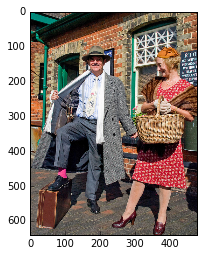

In [57]:
plt.imshow(v[:,:,[2,1,0]])

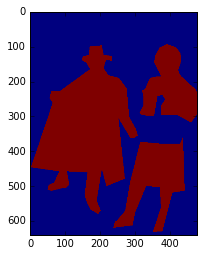

In [67]:
plt.imshow(v[:,:,5])

In [50]:
scale = 1
imageToTest = cv2.resize(dta_img, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
imageToTest_padded, pad = util.padRightDownCorner(imageToTest, 8, 128)

heatmap = cv2.resize(heat_result[38,:,:], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3]]
heatmap = cv2.resize(heatmap, (dta_img.shape[0], dta_img.shape[1]), interpolation=cv2.INTER_CUBIC)

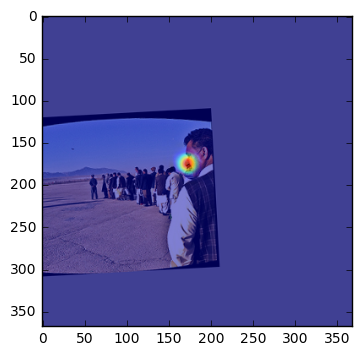

In [51]:
plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

# Verify data generator

In [52]:
from ds_iterator import DataIterator
di = DataIterator("../dataset/val_generated_dataset.h5", data_shape=(3, 368, 368),
                  mask_shape=(1, 46, 46),
                  label_shape=(57, 46, 46),
                  vec_num=38, heat_num=19, batch_size=10, shuffle=True)


x,y = di.next()
x,y = di.next()
x,y = di.next()

In [53]:
y[1].shape

(10, 46, 46, 19)

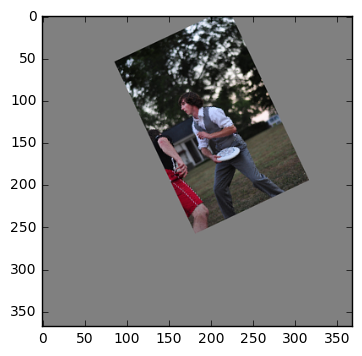

In [56]:
batch_index = 0
body_part = 0

dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

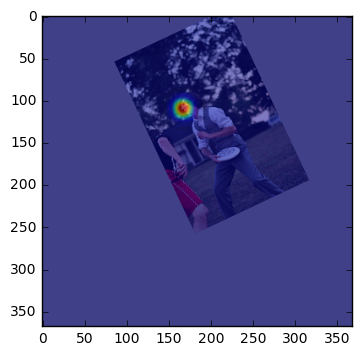

In [57]:
scale = 1
imageToTest = cv2.resize(dta_img, (0,0), fx=scale, fy=scale, interpolation=cv2.INTER_CUBIC)
imageToTest_padded, pad = util.padRightDownCorner(imageToTest, 8, 128)

heatmap = cv2.resize(y[1][batch_index, :, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)
heatmap = heatmap[:imageToTest_padded.shape[0]-pad[2], :imageToTest_padded.shape[1]-pad[3]]
heatmap = cv2.resize(heatmap, (dta_img.shape[0], dta_img.shape[1]), interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

# Verify data generator client

In [2]:
from ds_generator_client import DataGeneratorClient

In [3]:
client = DataGeneratorClient(port=5555, host="localhost", hwm=160, batch_size=10,stages=1,with_pafs=False)
client.restart()
batch_index = 0

In [32]:
train_di = client.gen()

In [33]:
x,y = train_di.next()

In [34]:
len(y[0])

10

In [35]:
print "X"
for xi in x:
    print(xi.shape)
print "Y"
for yi in y:
    print(yi.shape)


X
(10, 368, 368, 3)
(10, 46, 46, 19)
Y
(10, 46, 46, 19)


## Show orig image

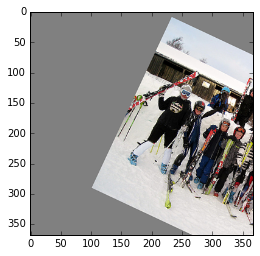

In [36]:
dta_img = x[0][0,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

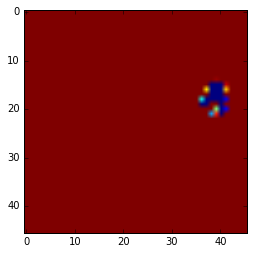

In [37]:
tmp = np.sum(x[1][0],axis=-1)
plt.imshow(tmp)

In [38]:
tmp

array([[19., 19., 19., ..., 19., 19., 19.],
       [19., 19., 19., ..., 19., 19., 19.],
       [19., 19., 19., ..., 19., 19., 19.],
       ...,
       [19., 19., 19., ..., 19., 19., 19.],
       [19., 19., 19., ..., 19., 19., 19.],
       [19., 19., 19., ..., 19., 19., 19.]])

# Show orig img + mask

0.0 1.0


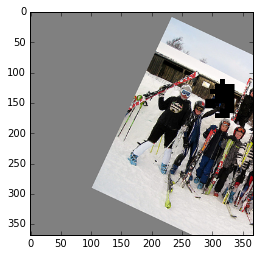

In [63]:
batch_index = 0
xv = x[0][batch_index,:,:,:]
xm = x[1][batch_index,:,:,:]
xm = np.sum(xm,axis=-1) / 19
xm = cv2.resize(xm, (0,0), fx=8, fy=8, interpolation=cv2.INTER_NEAREST)
print np.min(xm),np.max(xm)
xv[xm<1] = [0,0,0]
plt.imshow(xv[:,:,[2,1,0]])
# mask_img = x[1][batch_index,:,:,:]
# mask_img = cv2.resize(mask_img[:,:, 0], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

# plt.imshow(mask_img * 255, cmap='gray', alpha=.5)

# Show heatmap

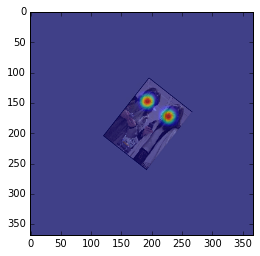

In [49]:
batch_index = 7
body_part = 0

dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

heatmap = cv2.resize(y[1][batch_index, :, :, body_part], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(heatmap[:,:], alpha=.5)

## Show PAF

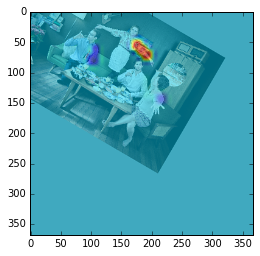

In [9]:
batch_index = 0
paf_idx = 22

dta_img = x[0][batch_index,:,:,:]
plt.imshow(dta_img[:,:,[2,1,0]])

paf = cv2.resize(y[0][batch_index, :, :, paf_idx], (0,0), fx=8, fy=8, interpolation=cv2.INTER_CUBIC)

plt.imshow(dta_img[:,:,[2,1,0]])
plt.imshow(paf[:,:], alpha=.5)

In [3]:
client.stop()